In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 分配表之編製

## 定性分配表之編製

In [12]:
index = ["國民黨", "民進黨", "新黨", "台聯黨", "建國黨", "其他"]
data = [80, 60, 10, 15, 5, 30]
df = pd.DataFrame(data = data, index = index, columns=["人數"])
df.index.name = "黨派"
df.pivot_table(
    index=["黨派"],
    values=["人數"], 
    margins=True,
    aggfunc=np.sum,
    margins_name="合計"
)

,人數
黨派,
其他,30
台聯黨,15
國民黨,80
建國黨,5
新黨,10
民進黨,60
合計,200


In [34]:
index = ["國民黨", "民進黨", "新黨", "台聯黨", "建國黨", "其他"]
data = {
    "男" : [35, 45, 6, 10, 2, 12],
    "女" : [45, 15, 4, 5, 3, 18]
}
df = pd.DataFrame(data = data, index = index)
df.index.name = "黨派"
pd.pivot_table(
    data=df,
    index=["黨派"],
    values=["男", "女"], 
    margins=True,
    aggfunc={
        "男" : np.sum,
        "女" : np.sum
    },
    margins_name="合計"
)

,女,男
黨派,,
其他,18,12
台聯黨,5,10
國民黨,45,35
建國黨,3,2
新黨,4,6
民進黨,15,45
合計,90,110


## 次數分配表之編製

In [81]:
df = pd.DataFrame({"data" : [75, 82, 60, 63, 35, 80, 61, 78, 71, 62, 72, 68, 51, 65, 53, 46, 70, 55, 31, 76, 59, 52, 64, 74, 79, 46, 69, 61, 74, 78, 49, 38, 71, 63, 49, 68, 66, 76, 73, 72, 80, 74, 58, 43, 60, 71, 41, 45, 53, 50, 66, 70, 59, 65, 76, 73, 64, 67, 82, 80]})
bins = pd.cut(x = df["data"], bins = 7)
df = df.groupby(bins).count()
df.index.name = "組界"
df.columns = ["組次數"]
df["以下累積"] = df["組次數"].cumsum()
df["以上累積"] = df.loc[::-1, "組次數"].cumsum()
df["相對次數"] = df["組次數"] / np.sum(df["組次數"])
df

,組次數,以下累積,以上累積,相對次數
組界,,,,
"(30.949, 38.286]",3,3,60,0.050000
"(38.286, 45.571]",3,6,57,0.050000
"(45.571, 52.857]",7,13,54,0.116667
"(52.857, 60.143]",8,21,47,0.133333
"(60.143, 67.429]",12,33,39,0.200000
"(67.429, 74.714]",15,48,27,0.250000
"(74.714, 82.0]",12,60,12,0.200000


# z-score

In [2]:
data = np.random.normal(50, 10, 60).round()
data

array([42., 53., 44., 54., 46., 44., 69., 44., 27., 64., 31., 37., 65.,
       73., 57., 39., 44., 40., 46., 51., 62., 42., 46., 49., 37., 46.,
       50., 40., 53., 41., 31., 41., 48., 65., 62., 47., 50., 62., 58.,
       50., 39., 62., 52., 41., 52., 63., 59., 24., 54., 47., 53., 56.,
       48., 49., 48., 69., 55., 47., 56., 73.])

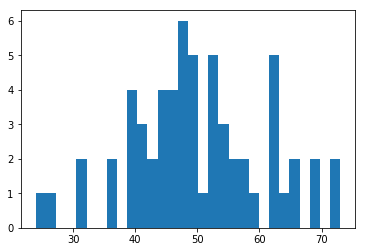

In [3]:
plt.hist(data, 30)
plt.show()

In [4]:
z_score = stats.zscore(data)
z_score

array([-0.74367029,  0.28530747, -0.55658342,  0.3788509 , -0.36949656,
       -0.55658342,  1.78200238, -0.55658342, -2.14682177,  1.31428522,
       -1.77264804, -1.21138745,  1.40782866,  2.15617611,  0.6594812 ,
       -1.02430058, -0.55658342, -0.93075715, -0.36949656,  0.0982206 ,
        1.12719836, -0.74367029, -0.36949656, -0.08886626, -1.21138745,
       -0.36949656,  0.00467717, -0.93075715,  0.28530747, -0.83721372,
       -1.77264804, -0.83721372, -0.18240969,  1.40782866,  1.12719836,
       -0.27595313,  0.00467717,  1.12719836,  0.75302463,  0.00467717,
       -1.02430058,  1.12719836,  0.19176404, -0.83721372,  0.19176404,
        1.22074179,  0.84656806, -2.42745207,  0.3788509 , -0.27595313,
        0.28530747,  0.56593777, -0.18240969, -0.08886626, -0.18240969,
        1.78200238,  0.47239433, -0.27595313,  0.56593777,  2.15617611])

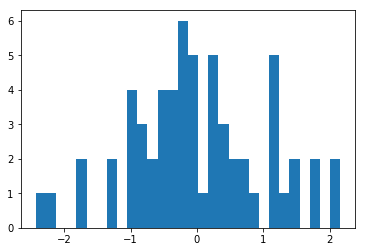

In [5]:
plt.hist(z_score, 30)
plt.show()

# cumulative distribution function

In [6]:
z_score = 1.96
stats.norm.cdf(z_score)

0.9750021048517795

# percent point function

In [7]:
stats.norm.ppf(0.9750021048517795)

1.959999999999999

# p-value

In [8]:
z_score = 1.96
p_value = 1 - stats.norm.cdf(z_score)
p_value

0.024997895148220484

# standard error of the mean

In [9]:
data = np.random.normal(50, 10, 60)
stats.sem(data)

1.4375806015384933

# correlation coefficient

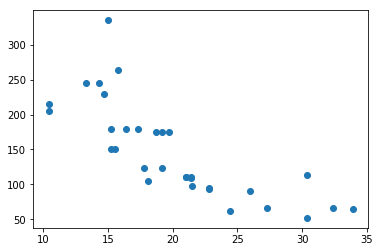

In [10]:
data_0 = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
data_1 = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245,
175, 66, 91, 113, 264, 175, 335, 109]
plt.scatter(data_0, data_1)
plt.show()

In [11]:
r, p_value = stats.pearsonr(data_0, data_1)
(r, p_value)

(-0.7761683718265864, 1.7878352541210664e-07)

In [12]:
r, p_value = stats.spearmanr(data_0, data_1)
(r, p_value)

(-0.8946646457499626, 5.085969430924412e-12)

# t-test

In [15]:
data_0 = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])
data_1 = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])
t_statistic, p_value = stats.ttest_ind(data_0, data_1)
(t_statistic, p_value)

(-5.458195056848408, 3.482072285015316e-05)